Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [5]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [6]:
import thinkstats2 as ts2
import thinkplot as tp

In [10]:
numChildrenPmf = ts2.Pmf(resp.numkdhh)

Display the PMF.

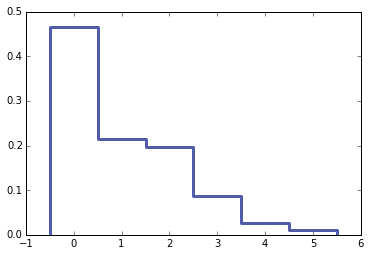

In [11]:
tp.Pmf(numChildrenPmf)

Define <tt>BiasPmf</tt>.

In [12]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [13]:
biasedNumChildrenPmf = BiasPmf(numChildrenPmf)

Display the actual Pmf and the biased Pmf on the same axes.

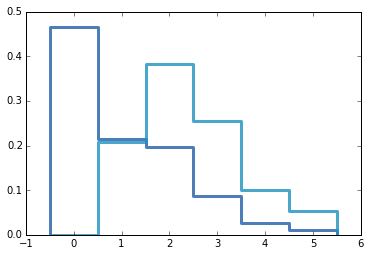

In [14]:
tp.Pmfs([numChildrenPmf, biasedNumChildrenPmf])

Compute the means of the two Pmfs.

In [15]:
numChildrenPmf.Mean(), biasedNumChildrenPmf.Mean()

(1.0242051550438309, 2.4036791006642821)

In [16]:
def PmfMean(pmf):
    return sum([p * x for x, p in pmf.Items()])

def PmfVar(pmf):
    mean = PmfMean(pmf)
    return sum([p * ((x - mean)**2) for x, p in pmf.Items()])


In [17]:
PmfMean(numChildrenPmf), numChildrenPmf.Mean()

(1.0242051550438309, 1.0242051550438309)

In [18]:
PmfVar(numChildrenPmf), numChildrenPmf.Var()

(1.4128643263531195, 1.4128643263531195)

In [19]:
withTwoOrMoreBabies = resp[resp.pregnum >= 2]

In [20]:
import nsfg
map = nsfg.MakePregMap(withTwoOrMoreBabies)

In [24]:
indices = map[10229]
withTwoOrMoreBabies
#withTwoOrMoreBabies.prglngth[indices].values

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
5,845,1,5,4,1,5,42,42,727,42,...,0,2335.279149,3725.796795,4705.681352,2,18,1234,1222,17:10:13,95.488000
8,8656,5,5,4,1,5,38,38,780,38,...,0,5198.652195,6027.568848,6520.021223,2,18,1237,1225,15:32:34,56.978833
10,5917,1,5,3,1,5,44,43,714,43,...,0,2418.624283,2762.143030,3488.586646,2,18,1233,1221,15:38:06,96.850167
12,6320,5,5,5,5,1,23,23,952,23,...,0,5497.225851,6448.332868,7241.477811,1,18,1236,1224,14:27:20,69.906500
13,11700,1,5,4,1,5,34,34,822,34,...,0,3362.448309,3677.062170,4666.559600,1,18,1236,1224,11:35:31,77.493333
14,7354,1,5,4,1,5,28,28,896,28,...,0,2417.628123,2790.899197,3026.730179,1,18,1235,1223,14:40:18,79.018500
16,4881,1,5,5,1,5,23,23,948,23,...,0,3292.089359,3935.302679,4419.344908,1,18,1234,1222,20:37:54,110.416833
17,5862,1,5,4,1,5,33,33,831,33,...,0,3056.771190,3456.489520,4386.630850,1,18,1234,1222,16:42:13,107.819667
18,8542,5,5,5,5,5,16,16,1036,16,...,0,5900.163872,6697.056170,7822.831313,1,18,1237,1225,13:04:36,72.481500


In [35]:
def ObservedPmf(actualPmf, observerSpeed):
    # Similar to BiasPmf, basically the bias is the observed speed here.
    # rather than the distribution's speed value.
    # See solution: chance of observing is proportional to the speed difference
    newPmf = actualPmf.Copy(label='observed speeds')
    for x in actualPmf.Values():
        diff = abs(x - observerSpeed)
        newPmf.Mult(x, diff)
    newPmf.Normalize()
    return newPmf
    

In [36]:
import relay

In [37]:
results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

speedsPmf = ts2.Pmf(speeds, 'speeds')
observedSpeedsPmf = ObservedPmf(speedsPmf, 7.5)

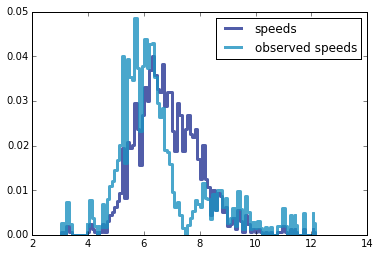

In [38]:
tp.PrePlot(2)
tp.Pmfs([speedsPmf, observedSpeedsPmf])
tp.Show()
